In [3]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
file = "Sample_Audio.mp3"

signal , sr = librosa.load(file)
print(signal.shape, sr)
print(f"Sample Rate = Sample Rate x Time( In Seconds )")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(2824202,) 22050
Sample Rate = Sample Rate x Time( In Seconds )


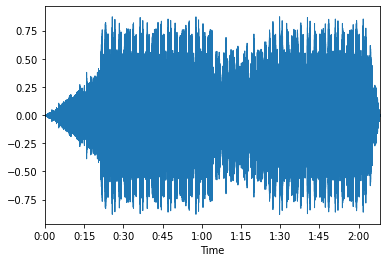

In [16]:
librosa.display.waveplot(signal, sr=sr)

In [23]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude)) 
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

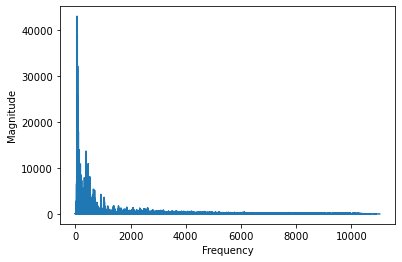

In [24]:
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [25]:
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectogram = np.abs(stft)

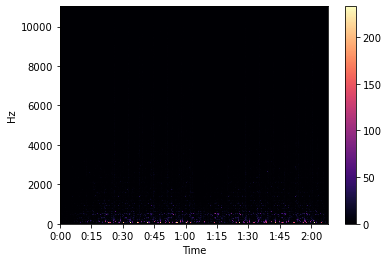

In [27]:
librosa.display.specshow(spectogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()

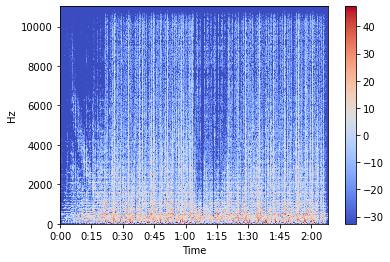

In [36]:
log_spectogram = librosa.amplitude_to_db(spectogram)
librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()

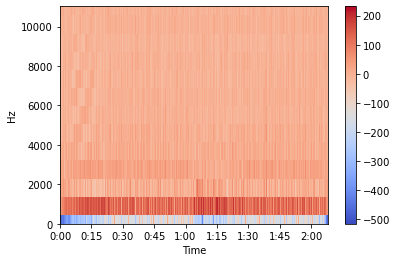

In [37]:
MFCC = librosa.feature.mfcc(
    signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCC, sr=sr,
                         hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()
